<a href="https://colab.research.google.com/github/davilucena222/projeto-processamento-digital-de-imagens/blob/main/Projeto_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO I - Processamento Digital de Imagens

Alunos:


1.   Carlos Fabrício da Silva Pontes
2.   Davi
3.   Abraão






## **Introdução**

### O processamento de imagens conduz nos atuais dias um forte crescimento e desenvolvimento para automatização de certos conteúdos. Em diversas áreas utilizam-se processos que foram aplicados neste projeto, envolvendo desde os pré-processamentos da imagem até visão computacional para tratativas e segmentações. No qual este projeto envolveu: controle de saturação através dos níveis de cinza (HSB/HSV), conversões de imagem RGB para YIQ com base na fórmula matricial, negativo X e Y das imagens absorvendo as cores que seriam emitidas nas bandas, o correlacionamento de imagens com máscaras (média, mediana, Sobel entre outros).



### Os objetivos em relação às conversões foi de inserir e controlar a luminância (Y) da imagem com adicional de suas crominâncias (I e Q) logos estas que por sua vez não possuem diretamente uma visualização. No ambiente de negativar as imagens, foram usadas técnicas de inversão de valores (baseados em sua vizinhança) de uma determinada banda para que em um dado pixel tivesse a predominância da mesma, logo em negativo Y obtivemos resultados nos quais o preto se tornou branco e o branco se tornou preto. No correlacionamento de imagens, foram levados em consideração vizinhanças com extensão por zero (offset), a interpolação do pivô na máscara seja ela qualquer, com o propósito de: suavização de imagens, extração de ruídos (salt-and-pepper), detecção de bordas com máscaras convolucionais. E como último ponto a ser tratado, foi implementado o controle de matiz e saturação de uma imagem, por sua parte foram utilizadas fórmulas de angulação de quadrantes de cores, croma, e "value"(brightness -> brilho) que formam o HSB ou também conhecido HSV.






## **Matériais e métodos**

### Neste trabalho fizemos uso de bibliotecas e ferramentas ao longo do desenvolvimento de cada questão para converter valores e preencher arrays com os seus devidos valores já convertidos. Na construção de algoritmos como o de correlação, conversão de RGB para YIQ, filtros da média, mediana e sobel foram desenvolvidos com o auxílio de bibliotecas como a numpy, matplotlib e os. Essas bibliotecas auxiliaram em conversões de certos tipos de dados para outros tipos e operações básicas também para chegar até tal objetivo. Além disso, foi preciso capturar cada dado convertido para ser exibido de forma correta como imagem, para realizar tal feito foi necessário utilizar algumas bibiotecas de imagem para ajudar a construir um novo modelo de imagem, filtrar dados da imagem, unir dados de uma imagem com outra e por fim exibi-la já alterada com seus dados modificados. No entanto, para isso foi preciso utilizar algumas bibliotecas advindas da biblioteca PIL, como a biblbioteca Image que realiza operações básicas sobre imagens como a cópia, a biblioteca ImageFilter, ImageEnhance que modifica propriedades da imagem  e por último a biblioteca ImageOps que modifica o tamanho de uma imagem, expande a imagem e também modifica as suas propriedades.

### Ao longo deste trabalho aplicamos conceitos como a conversão de imagens RGB para YIQ, aplicamos também o conceito de inversão de cores em imagens em cada banda de R, G ou B, utilizamos também o conceito de correlação para realizar a operação entre a máscara definida e a imagem, realizamos aplicações de filtros como o da média, mediana e Sobel a fim de realizar testes e verificar como a imagem se comportaria dada a aplicação de cada filtro. Além disso, aplicamos conceitos básicos de cores entre imagens como somar cores, subtrair cores para identificar os níveis de cinza. Por último, aplicamos o conceito de HSB junto com o controle de saturação e a conversão de imagens para RGB, na aplicação destes conceitos foi possível modificar a matiz da imagem, realizar a normalização de valores entre 0 e 1, calcular o valor da cor mais predominante, separar as bandas RGB para aplicar operações em cada uma delas, definir o setor dos ângulos em que as cores estariam presentes com base no conceito de quadrantes e gradiente para realizar o controle de saturação de forma precisa na hora da conversão e suas operações.

### Conectando ao drive

In [ ]:
from google.colab import drive
drive.mount('Mount')

Mounted at Mount


### Importando bibliotecas

In [ ]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

### Definindo o diretório raiz, onde as imagens serão abertas e salvas

In [ ]:
os.chdir('/content/Mount/My Drive/Colab Notebooks')
os.getcwd()
os.listdir()

def out_file(filename):
    return os.path.join(filename)


FileNotFoundError: ignored

### Abrindo arquivos onde serão aplicadas as técnicas deste projeto

In [ ]:
Shapes = Image.open('Shapes.png')
print('Mode:',Shapes.mode)
print('Size:',Shapes.size)
print('Type:',type(Shapes))
print("")
DancingInWater = Image.open('DancingInWater.jpg')
print('Mode:',DancingInWater.mode)
print('Size:',DancingInWater.size)
print('Type:',type(DancingInWater))
print("")
Testpat = Image.open('testpat.1k.color.tif')
print('Mode:',Testpat.mode)
print('Size:',Testpat.size)
print('Type:',type(Testpat))

Mode: RGB
Size: (500, 500)
Type: <class 'PIL.PngImagePlugin.PngImageFile'>

Mode: RGB
Size: (3000, 2000)
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>

Mode: RGB
Size: (1024, 1024)
Type: <class 'PIL.TiffImagePlugin.TiffImageFile'>


### Exibindo imagens originais para teste

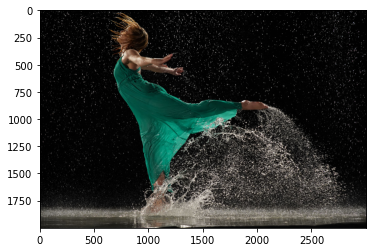

In [ ]:
plt.imshow(DancingInWater)
# plt.imshow(Testpat)
# plt.imshow(Shapes)

## 1 - Conversão RGB-YIQ-RGB.

Para esta conversão, utilizamos um array que iria conter os valores que teriam que ser aplicados a imagem original(na forma de matriz) para ser convertida. Fizemos isso tanto para a ida como para a volta, utilizando de loops para percorrer cada pixel, e aplicando o produto interno do valor original com a matriz definida para fazer os cálculos

In [ ]:
def rgb_to_yiq(rgb):
    copyImg = rgb.copy()

    arrayImg = np.array(copyImg).astype(np.float64)

    # Formúla para converter rgb para yiq
    YIQ = np.array([[0.299, 0.587, 0.114],
                    [0.596, -0.274, -0.322],
                    [0.211, -0.523, 0.312]])


    # Para cada linha e coluna (atingir cada pixel)
    for indiceLinha, linha in enumerate(arrayImg):
        for indiceColuna, coluna in enumerate(linha):
            # Produto interno do pixel com a matriz YIQ
            arrayImg[indiceLinha][indiceColuna] = np.dot(YIQ, np.array(coluna))

    return arrayImg


def yiq_to_rgb(yiq):
    arrayImagem = np.copy(yiq)
    arrayImagem = arrayImagem.astype(np.float64)

    # Matriz que será aplicada para conversão
    RGB = np.array([[1, 0.956, 0.621],
                    [1,-0.272, -0.647],
                    [1,-1.106, 1.703]])

    for indiceLinha, linha in enumerate(arrayImagem):
        for indiceColuna, coluna in enumerate(linha):
            # Faz o produto interno com a matriz RGB
            pixelRGB = np.dot(RGB, coluna)

            # Arredonda e limita os valores
            pixelRGB = np.around(pixelRGB).astype(np.uint8)
            pixelRGB = np.clip(pixelRGB, 0, 255)
            # Coloca na posição inicial o novo pixel RGB
            arrayImagem[indiceLinha][indiceColuna] = pixelRGB


    arrayImagem = arrayImagem.astype(np.uint8)
    return Image.fromarray(arrayImagem)





### Testando conversão

Text(0.5, 1.0, 'RGB - YIQ - RGB')

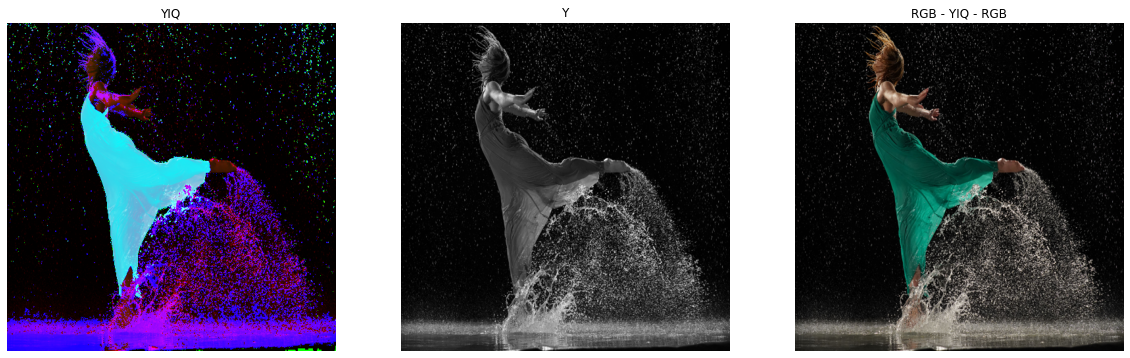

In [ ]:
# Redimensionar as imagens
DancingInWater = DancingInWater.resize((500,500))
Shapes = Shapes.resize((500,500))
Testpat = Testpat.resize((500,500))

# Define qual vai ser a imagem
imgEscolhida = DancingInWater
# imgEscolhida = Testpat
# imgEscolhida = Shapes


# Arredonda os valores e limitar (Valores entre 0 e 255)
yiqArrayImg = np.around(rgb_to_yiq(imgEscolhida)).astype(np.uint8)
yiqArrayImg = np.clip(yiqArrayImg, 0, 255)
yiqImage = Image.fromarray(yiqArrayImg)


fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(yiqImage)
plt.axis('off')
plt.title("YIQ")

imgYIQ = yiqImage.split();
fig.add_subplot(1, 3, 2)
plt.imshow(imgYIQ[0], cmap="gray")
plt.axis('off')
plt.title("Y")

imagemResultante = yiq_to_rgb(rgb_to_yiq(imgEscolhida))

fig.add_subplot(1, 3, 3)
plt.imshow(imagemResultante)
plt.axis('off')
plt.title("RGB - YIQ - RGB")

## 2 - Negativo em RGB (banda a banda) e na banda Y, seguida de conversão para RGB.

### Solução

Para esta conversão, definimos primeiramente a função negativoRGB, onde os parâmetros utilizados definiriam em qual/quais bandas iriamos aplicar o negativo. Depois bastou percorrer cada pixel da imagem por meio de loops for, e em seguida, mapear cada componente e aplicar o cálculo para obter o negativo (255 - componente)

Para o negativo em Y, primeiramente, fizemos a conversão de rgb para yiq, utilizando a função definida na questão anterior, então percorremos cada pixel, e aplicamos o cálculo do negativo apenas na banda de indice 0, que corresponde ao Y de cada pixel

In [ ]:
# Função com parâmetros para determinar em qual/quais banda será aplicada o negativo
def negativoRGB(img, Red=False, Green=False, Blue=False):
    imgArray = np.array(img)
    for indiceLinha, linha in enumerate(imgArray):
        for indiceColuna, coluna in enumerate(linha):
            for indiceComponente, componente in enumerate(coluna):
                if (Red and indiceComponente == 0):
                    imgArray[indiceLinha][indiceColuna][0] = 255-componente
                if (Green and indiceComponente == 1):
                    imgArray[indiceLinha][indiceColuna][1] = 255-componente
                if (Blue and indiceComponente == 2):
                    imgArray[indiceLinha][indiceColuna][2] = 255-componente
    return Image.fromarray(imgArray)

def negativoY(img):
    # Converte a imagem original em YIQ
    arrayImgYIQ = rgb_to_yiq(img)
    for indiceLinha, linha in enumerate(arrayImgYIQ):
        for indiceColuna, coluna in enumerate(linha):
            # Pega o componente Y deste pixel
            arrayImgYIQ[indiceLinha][indiceColuna][0] = 255.0 - (arrayImgYIQ[indiceLinha][indiceColuna][0])

    # Converte de volta para RGB
    return yiq_to_rgb(arrayImgYIQ)



### Realizando testes



(-0.5, 2999.5, 1999.5, -0.5)

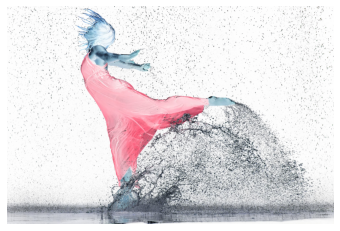

In [ ]:
imgNegativoRGB = negativoRGB(DancingInWater,Red=True, Green=True, Blue=True)
# imgNegativoY = negativoY(DancingInWater)

plt.imshow(imgNegativoRGB)
plt.axis("off")
#plt.imshow(imgNegativoY)

# imgNegativoY.save(out_file("DancingInWaterNegativoY.jpg"))

## 3 - Correlação m x n sobre R, G e B, com offset, e filtro e pivô definidos em um arquivo(txt) a parte.

### Abrindo arquivo onde será definido os elementos da correlação


In [ ]:
arquivo = open("correlacaoSobelHorizontal.txt", "r")
linhas = arquivo.readlines()

dimensao_mascara = list(map(int, (linhas[0].split())))

filtroStr = linhas[1].split()
filtro = []
for f in filtroStr:
  filtro.append(float(eval(f)))


pivo = list(map(int, (linhas[2].split())))
offset = int(linhas[3])


### Expansão de histograma

In [ ]:
def expansao_histograma(imagem):
  yiqArrayImg = np.around(rgb_to_yiq(imagem)).astype(np.uint8)
  yiqArrayImg = np.clip(yiqArrayImg, 0, 255)

  lista_y = []

  # Percorrer cada pixel da imagem
  for indiceLinha, linha in enumerate(yiqArrayImg):
      for indiceColuna, coluna in enumerate(linha):
          # Adicionar a lista_y o valor do componente y deste pixel
          lista_y.append(yiqArrayImg[indiceLinha][indiceColuna][0])

  # Define o yMax e yMin da imagem (Luminância)
  yMax = max(lista_y)
  yMin = min(lista_y)


  for indiceLinha, linha in enumerate(yiqArrayImg):
        for indiceColuna, coluna in enumerate(linha):
            for indiceComponente, componente in enumerate(coluna):
              if componente != 0 and indiceComponente == 0:
                # Aplica a fórmula da expansão ao componente Y de cada pixel
                yiqArrayImg[indiceLinha][indiceColuna][0] = round((componente - yMin) / (yMax - yMin) * 255)

  yiqArrayImg = np.clip(yiqArrayImg, 0, 255)
  imgResult = Image.fromarray(yiqArrayImg).split()
  return imgResult[0]



### Função para correlação

Para aplicar a correlação, primeiramente obtemos a largura e altura da imagem. Depois

In [ ]:
def correlacao(imagem, offset, pivo, mascara, dimensao_mascara):
    width, height = imagem.size
    imagemResultante = Image.new("RGB", (width, height))
    soma_r = 0
    soma_g = 0
    soma_b = 0

    for row in range(width):
      for col in range(height):

        # Reseta a soma de cada componente
        soma_r = 0;
        soma_g = 0;
        soma_b = 0;

        # Monta a tupla (x, y)
        pixel = (row, col)
        linha = pixel[0];
        coluna = pixel[1]
        i = 0

        # for que vai percorrer a vizinhança do píxel de acordo com a dimensão do mascara e o pivo
        for m in range(linha-pivo[0], linha+ (dimensao_mascara[0] - pivo[0])):
            for n in range(coluna-pivo[1], coluna+ (dimensao_mascara[1] - pivo[1])):

                # verificando se está dentro dos limites da imagem
                if m >= 0 and m < width and n >= 0 and n < height:
                    pxl = imagem.getpixel((m,n))

                    # aplicando correlação em cada componente
                    soma_r += pxl[0] * mascara[i]
                    soma_g += pxl[1] * mascara[i]
                    soma_b += pxl[2] * mascara[i]
                else:
                    soma_r += 0;
                    soma_g += 0;
                    soma_b += 0;
                # i para percorrer as posições da mascara
                i+=1


        # aplicando o brilho nas componentes
        if offset != 0:
          soma_r += offset
          soma_g += offset
          soma_b += offset



        imagemResultante.putpixel((linha, coluna), (int(soma_r), int(soma_g), int(soma_b)))

    return imagemResultante



### Teste correlação

(-0.5, 199.5, 199.5, -0.5)

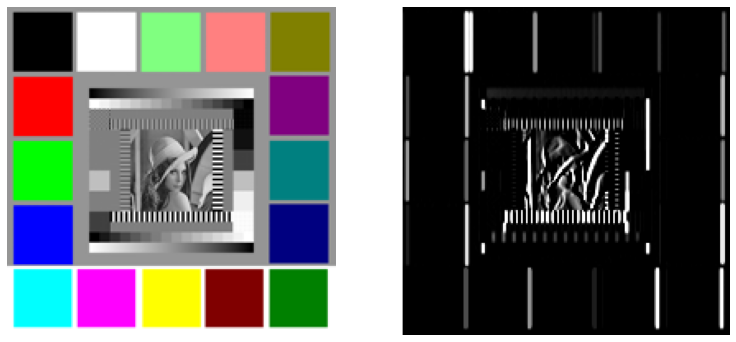

In [ ]:
imagem = Testpat.resize((200,200))

imagemCorrelacao = correlacao(imagem, offset, pivo, filtro, dimensao_mascara)

fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(imagem)
plt.axis('off')

imagemCorrelacao = expansao_histograma(imagemCorrelacao)
fig.add_subplot(1, 3, 2)
plt.imshow(imagemCorrelacao)
plt.imshow(imagemCorrelacao, cmap="gray")
plt.axis('off')

# imagemResultante.save(out_file("Testpat-sobelvertical.jpg"))


## 4 - FILTRO MEDIANA

Text(0.5, 1.0, 'Após filtro mediana')

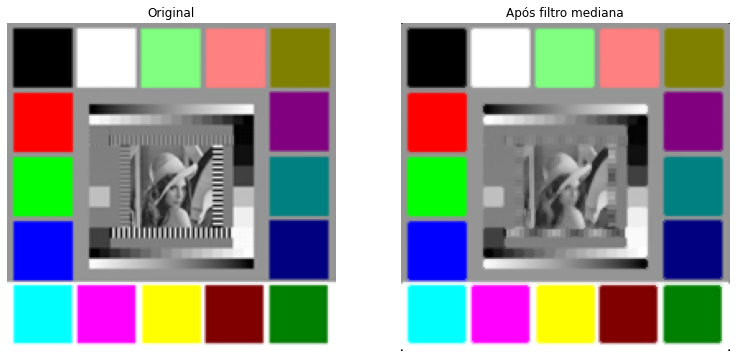

In [ ]:
Testpat = Testpat.resize((200,200))
width, height = Testpat.size
nova_img = Image.new("RGB", (width, height))

# Percorre todos os pixels
for linha in range(width):
    for coluna in range(height):
        lista_r = []
        lista_g = []
        lista_b = []

        # Vẽ os pixels vizinhos (máscara 3x3)
        for m in range(linha-1, linha+2):
            for n in range(coluna-1, coluna+2):
                # Verifica se está dentro dos limites da imagem
                if m >= 0 and m < width and n >= 0 and n < height:
                    pxl = Testpat.getpixel((m,n))

                    lista_r.append(pxl[0])
                    lista_g.append(pxl[1])
                    lista_b.append(pxl[2])
                else:
                    lista_r.append(0)
                    lista_g.append(0)
                    lista_b.append(0)

        # Ordena os valores
        lista_r.sort()
        lista_g.sort()
        lista_b.sort()

        nova_img.putpixel((linha, coluna), (lista_r[4], lista_g[4], lista_b[4]))

fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(Testpat)
plt.axis('off')
plt.title("Original")

fig.add_subplot(1, 3, 2)
plt.imshow(nova_img)
plt.axis('off')
plt.title("Após filtro mediana")



## 5 - HSB

### Definindo funções para conversão

Para isto

In [ ]:
def RGB2HSV(RGB):
    # Normaliza os valores entre 0.0 - 1.0 (float64)
    RGB_normalizada = RGB / 255.0

    # Separa as bandas
    R = RGB_normalizada[:, :, 0]
    G = RGB_normalizada[:, :, 1]
    B = RGB_normalizada[:, :, 2]

    # Valor máximo entre as bandas, para cada pixel
    maxValue = np.max(RGB_normalizada, axis=2)

    # Valor mínimo entre as bandas
    minValue = np.min(RGB_normalizada, axis=2)

    # croma - Variação entre o maxValue e minValue
    Croma = maxValue - minValue

    # Verifica se a matiz pode ser computada
    matizComputavel = Croma > 0


    #  Verifica qual banda tem o valor máximo em cada pixel
    r_eh_max = np.logical_and(R == maxValue, matizComputavel)
    g_eh_max = np.logical_and(G == maxValue, matizComputavel)
    b_eh_max = np.logical_and(B == maxValue, matizComputavel)

    # Calcula a matiz
    H = np.zeros_like(maxValue)
    H_r = ((G[r_eh_max] - B[r_eh_max]) / Croma[r_eh_max]) % 6
    H_g = ((B[g_eh_max] - R[g_eh_max]) / Croma[g_eh_max]) + 2
    H_b = ((R[b_eh_max] - G[b_eh_max]) / Croma[b_eh_max]) + 4

    H[r_eh_max] = H_r
    H[g_eh_max] = H_g
    H[b_eh_max] = H_b
    H *= 60

    # Atribui o valor maximo entre as bandas a luminância
    V = maxValue

    # Verifica se a saturação eh computável
    saturacaoComputavel = V > 0

    # Calcula a saturação
    S = np.zeros_like(maxValue)
    S[saturacaoComputavel] = Croma[saturacaoComputavel] / V[saturacaoComputavel]

    # retorna em matriz
    return np.dstack((H, S, V))


def HSV2RGB(HSV):

    # Separa as bandas
    H = HSV[:, :, 0]
    S = HSV[:, :, 1]
    V = HSV[:, :, 2]

    # Calcula o Croma
    C = V * S

    # Normaliza a matiz
    H_ = H / 60.0

    # Calcula o valor da segunda cor predominante
    X  = C * (1 - np.abs(H_ % 2 - 1))


    # Definir o setor (ângulo) onde se encontra a cor
    H_0_1 = np.logical_and(0 <= H_, H_<= 1)                   # 0º e 60º
    H_1_2 = np.logical_and(1 <  H_, H_<= 2)                   # 60º e 120º
    H_2_3 = np.logical_and(2 <  H_, H_<= 3)                   # 120º e 180º
    H_3_4 = np.logical_and(3 <  H_, H_<= 4)                   # 180º e 240º
    H_4_5 = np.logical_and(4 <  H_, H_<= 5)                   # 240º e 300º
    H_5_6 = np.logical_and(5 <  H_, H_<= 6)                   # 300º e 360º


    R1G1B1 = np.zeros_like(HSV)

    # Array de zeros para usar nos cálculos
    Z = np.zeros_like(H)

    R1G1B1[H_0_1] = np.dstack((C[H_0_1], X[H_0_1], Z[H_0_1]))  # 0º e 60º
    R1G1B1[H_1_2] = np.dstack((X[H_1_2], C[H_1_2], Z[H_1_2]))  # 60º e 120º
    R1G1B1[H_2_3] = np.dstack((Z[H_2_3], C[H_2_3], X[H_2_3]))   # 120º e 180º
    R1G1B1[H_3_4] = np.dstack((Z[H_3_4], X[H_3_4], C[H_3_4]))  # 180º e 240º
    R1G1B1[H_4_5] = np.dstack((X[H_4_5], Z[H_4_5], C[H_4_5]))   # 240º e 300º
    R1G1B1[H_5_6] = np.dstack((C[H_5_6], Z[H_5_6], X[H_5_6]))   # 300º e 360º

    # Corrige os valores adicionando m
    m = V - C
    RGB = R1G1B1 + np.dstack((m, m, m))

    return RGB


### Testando funções de conversão

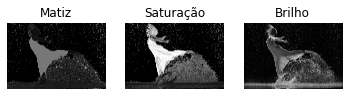

In [ ]:
imagem = DancingInWater
# imagem = Testpat
# imagem = Shapes
RGB = np.array(imagem).astype(np.float64)

# Converte imagem RGB para HSV
HSV = RGB2HSV(RGB)

# Separa as bandas
HUE = HSV[:, :, 0]
SAT = HSV[:, :, 1]
VAL = HSV[:, :, 2]


# Plota cada banda separada(H, S, V)
plt.subplot(1,3,1)
plt.imshow(HUE, cmap='gray')
plt.title('Matiz')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('Saturação')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(VAL, cmap='gray')
plt.title('Brilho')
plt.axis('off')
plt.show()

# Plotar com as 3 bandas ao mesmo tempo
# plt.imshow(HSV)

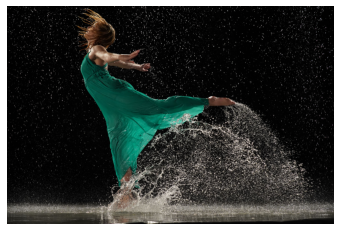

In [ ]:
RGB = HSV2RGB(HSV)                                # Converte HSV para RGB

plt.imshow(RGB)                                   # Plotar imagem
plt.axis('off')
plt.show()

### Alterando valores em matiz, saturação e brilho

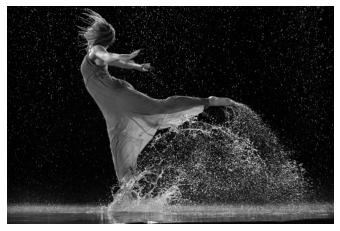

In [ ]:
# Altera o valor da matiz
HUE2 = (HUE + 120) % 360

# Aumenta a saturação
SAT2 =  np.minimum(SAT * 0, np.ones_like(SAT))

# Aumenta o brilho
VAL2 =  np.minimum(VAL * 2, np.ones_like(VAL))


# Monta uma nova matriz com HSV
HSV2 = np.dstack((HUE, SAT2, VAL))

# Convert para RGB
RGB2 = HSV2RGB(HSV2)

# Plota imagem
plt.imshow(RGB2)
plt.axis('off')
plt.show()

## Resultados

### Após as aplicações dos conceitos discutidos anteriormente em cada questão foi possível chegar a cada objetivo estabalecido.

### Na questão 1 obtemos a imagem RGB convertida para YIQ com suas propriedades de cores modificadas para cada uma das 3 bandas, além disso separamos a imagem na banda YIQ, na banda RGB e também na banda Y para realizar comparações e entender quais modificações foram realizadas após todo o processo de conversão.

### Na questão 2 aplicamos o negativo na imagem de entrada e configuramos o algoritmo para ser dinâmico e aplicar o negativo na banda R, G ou B, em seguida a imagem é convertida para YIQ e depois para RGB, com isso aplicamos o negativo e obtemos o resultado esperado, onde tinha cor branca passou a receber cor preta, e onde tinha cor preta passou a receber cor branca e onde estava presente as três componentes RGB passou a receber as cores secundárias tendo em vista que o negativo em uma componente pode ocasionar a ocorrência de outra cor com as possíveis misturas.

### Já para a questão 3 como resultado obtemos alguns comportamentos relacionados a imagem após realizadas as operações entre a própria imagem e uma máscara. Nesta questão aplicamos alguns filtros como o da média onde foi possível perceber desfoques na imagem, mas também ocorrências de desfoques em formato de caixas, pois o próprio filtro da média ocasiona tal ocorrência, utilizamos o filtro de Sobel horizontal e como resultado a imagem demonstrou de forma bem explicítias a presença de bordas verticais em sua composição, quando aplicado o filtro de Sobel vertical foi detectado bordas mais horizontais na imagem e a distinção de uma borda para outra estava bastante perceptível.

### Na questão 4 foi aplicado o filtro da mediana e como resultado da imagem de saída tivemos uma imagem com um desfoque mais natural comparado ao desfoque que o filtro da média provoca em uma imagem, além disso as cores da imagem ficaram mais próximas e o contorno ficou maior, como consequência o ruído da imagem também é dimnuído a imagem fica mais limpa, porém fica mais borrada pois quanto maior a máscara maior é o borrado da imagem de saída.

### Por último, na questão 5 tivemos uma imagem com alguns comportamentos devido o controle da saturação no sistema HSB. Primeiramente separamos a imagem em cada banda do HSB para observar e entender o seu comportamento, na banda HUE obtivemos uma imagem mais escura devido as variações de sua matiz, ou seja, as suas componentes R, G e B, na banda SATURATION ou SATURAÇÃO tivemos uma imagem com variações de tons de cinza claro e cinza escuro devido a variação de cor RGB, seja ela uma variação clara ou variação escura da imagem em cada ponto e na banda BRIGHTNESS ou BRILHO o resultado foi de uma imagem com algumas variações de brilho mais clara e mais escura a depender da região da própria imagem e levando-se em consideração a sua matiz. Em seguida convertemos a imagem para RGB aplicando o controle de saturação e a partir desse momento a imagem e suas propriedades começaram a se comportar de algumas maneiras quando a matiz, a saturação ou seu brilho são alterados, pois quando se altera a saturação por exemplo a matiz com valores menores é aumentada, a luminância como consequência também é aumentada, a ocorrência de variações de cores são perceptíveis a depender da alteração da matiz, saturação e brilho.




## Discussão

### Apesar de não exigir um conhecimento avançado de programação para implementação destas operações, foi necessário ter um bom domínio do uso das bibliotecas para operações matemáticas e manipulação de imagens.

### Algumas vezes, ocorreram problemas em algumas operações, e que custaram um certo tempo pra resolver, justamente pela falta de experiência para lidar com essas bibliotecas. Os principais foram em relação a operações em matrizes, produto interno e conversão de valores e tipos. Também ocorreram problemas relacionados a estrutura de dados, como arrays e listas.

### Porém, todos estes problemas foram resolvidos até a data de entrega, com todas as implementações gerando os resultados esperandos. Alguns resultados se tornaram um pouco difíceis de serem observados, como a aplicação de alguns filtros, e pra essas situações, reduzimos as imagens, e com menos pixels, se tornou mais fácil de observar as mudanças. O grande número de pixels também mostrou problemas relacionados ao tempo de execução e ao custo computacional, pois, dada uma imagem de muitos pixels, as operações serão muito mais demoradas e custosas, logo também foi necessário um redimensionamento da imagem.



## Conclusão

### Neste trabalho, foi abordado diversas técnicas de processamento digital de imagens, como conversão de cores, filtros e correlação e os resultados foram bem satisfatórios. As práticas deste projeto permitiu ter uma melhor visão sobre os temas abordados em aula, pois a experiência prática consolida ainda mais o aprendizado.
### Além disso, este trabalho proporcionou um aprendizado em relação a manipulação de arquivos de texto e imagens, e também operações matemáticas juntamente com estruturas de programação para chegar aos resultados esperados.
### Todas as questões foram implementadas e testadas, e pode-se concluir que as implementações geraram os resultados interessantes, onde pudemos ver a diferença bem vísivel provocada pelas operações de processamento de imagens.